In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats
import datetime as dt
import statsmodels.api as sm


# Question 1

In [2]:
# Question 1

dailyIntake = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])

# sample mean, sample standard deviation, standard error of the mean (SEM), t statistic, degrees of freedom and p-value
# calculate sample mean
sampleMean = dailyIntake.mean()
# calculate the sample standard deviation
sampleStandardDeviation = dailyIntake.std(ddof=1)
# calculate standard error of the mean (SEM)
SEM = sampleStandardDeviation / np.sqrt(np.size(dailyIntake))
# calcuate t 
t = (sampleMean - 7725) / SEM
#  calculate degrees of freedom
df = np.size(dailyIntake) - 1
# calculate p-value for two-tailed test
p = scipy.stats.t.sf(abs(t), df=df)*2

print("sample mean: " + str(sampleMean))
print("sample standard deviation: " + str(sampleStandardDeviation))
print("sample standard error of the mean (SEM): " + str(SEM))
print("t: " + str(t))
print("degrees of freedom: " + str(df))
print("p-value: " + str(p))

print("a two-tailed test should be used because the alternative hypothesis checks if the mean daily intake is not equal to 7725 kJ")
print("the null hypothesis is rejected because the p-value is less than alpha")

sample mean: 6753.636363636364
sample standard deviation: 1142.1232221373727
sample standard error of the mean (SEM): 344.3631083801271
t: -2.8207540608310198
degrees of freedom: 10
p-value: 0.018137235176105812
a two-tailed test should be used because the alternative hypothesis checks if the mean daily intake is not equal to 7725 kJ
the null hypothesis is rejected because the p-value is less than alpha


# Question 2

In [3]:
# Question 2

# mean, sample size and standard deviation of the two samples
meanI = 74; nI = 42; stdI = 7.4
meanE = 57; nE = 61; stdE = 7.1
# calculate the standard deviation of the population
sP = np.sqrt(((nI - 1)*stdI**2 + (nE - 1)*stdE**2) / (nI + nE - 2))
# calculate t
t = (meanI - meanE) / (sP * np.sqrt((1/nI) + (1/nE)))
# calculate degrees of freedom
df = nI + nE - 2
# calculate p-value for one-tailed test
p = scipy.stats.t.sf(abs(t), df=df)


print("test should be two-sample test because we are trying to compare the mean of two samples: the ireland and elsewhere")
print("the test is a right-tailed test because the alternative hypothesis is that ireland's guinness is greater than elsewhere")
print("t: " + str(t))
print("degrees of freedom: " + str(df))
print("p-value: " + str(p))
print("The difference is significant because p-value is less than alpha")

test should be two-sample test because we are trying to compare the mean of two samples: the ireland and elsewhere
the test is a right-tailed test because the alternative hypothesis is that ireland's guinness is greater than elsewhere
t: 11.73775770205081
degrees of freedom: 101
p-value: 6.979768077580737e-21
The difference is significant because p-value is less than alpha


# Question 3

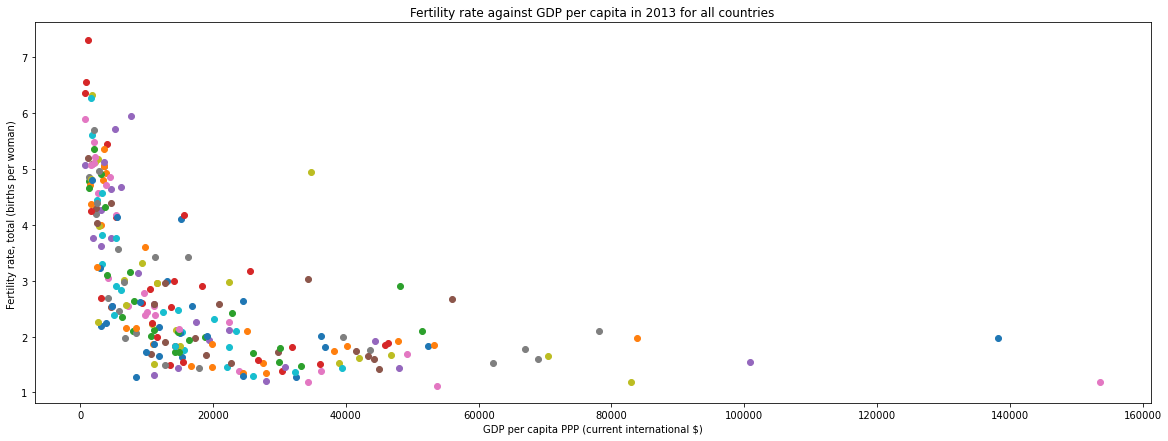

correlation coefficient: -0.5255135380223263
The correlation coefficient of -0.52 shows us that the fertility rate and GDP per capita have a negative correlation.      However their negative correlation is not perfect since their coefficient is not -1.


In [4]:
# Question 3

# read the GDP excel file and remove the first 2 rows
dfGDP = pd.read_excel('API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_4546474.xls', header = 2)
# set the first row as the column names
dfGDP = dfGDP.rename(columns=dfGDP.iloc[0]).loc[1:]
# selected only the columns we are interested in
dfGDP = dfGDP[['Country Name', 'Country Code', 2013.0]]
# read the fertility excel file and remove the first 2 rows
dfFER = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_4521929.xls', header = 2)
# set the first row as the column names
dfFER = dfFER.rename(columns=dfFER.iloc[0]).loc[1:]
# selected only the columns we are interested in
dfFER = dfFER[['Country Name', 'Country Code', 2013.0]]


# making the graph bigger for better visibility
plt.figure(figsize=(20, 7))

# loop every row and plot FER against GDP for 2013
for x in range(0, len(dfGDP)):
    plt.scatter(dfGDP[2013.0].iloc[x], dfFER[2013.0].iloc[x])
#     plt.annotate(dfGDP.iloc[x]['Country Code'], (dfGDP[2013.0].iloc[x], dfFER[2013.0].iloc[x]), xytext=(1, 6), textcoords="offset pixels")


# naming the x axis
plt.xlabel('GDP per capita PPP (current international $)')
# naming the y axis
plt.ylabel('Fertility rate, total (births per woman) ')

# giving a title to my graph
plt.title('Fertility rate against GDP per capita in 2013 for all countries')


plt.show()

# calculate the correlation coefficient
correlation = dfGDP[2013.0].corr(dfFER[2013.0])

print("correlation coefficient: " + str(correlation))


print("The correlation coefficient of -0.52 shows us that the fertility rate and GDP per capita have a negative correlation.\
      However their negative correlation is not perfect since their coefficient is not -1.")



# Question 4

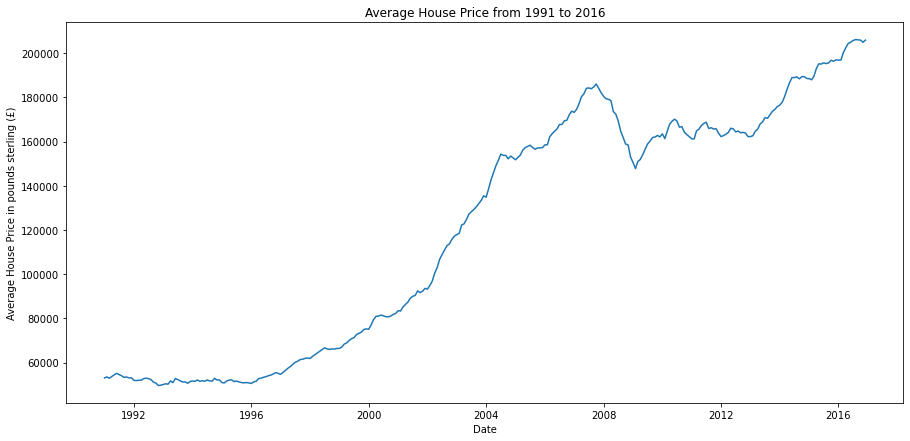

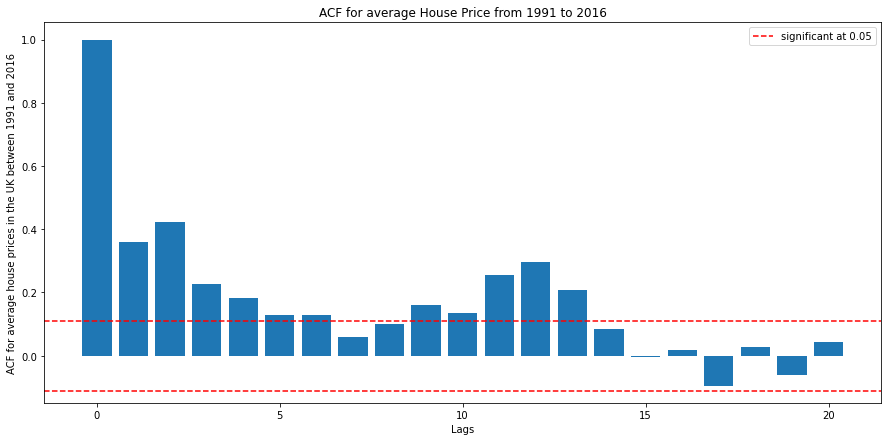

annualized return of Houses in %: 5.35423853535919
There seems to be a trend where the price reaches a peak and decreases again. But the peak and the rate it decreases is not the same
There seems to be that there are seasons where the price increases and after reaching a certain point it decreases. But that doesn't continue after the 14th lag


In [34]:
# Question 4

# read the house price excel file and load it into a dataframe
dfMHP = pd.read_excel('Monthly Average House Price.xls')
# rename the Unnamed column as date
dfMHP.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
# select only rows of the dates between 1991 and 2016
dfMHP = dfMHP.loc[dfMHP['Date'].between('1991-01-01', '2016-12-31')]

# making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

# plot the price against date
plt.plot(dfMHP['Date'], dfMHP['Average House Price'])

# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Average House Price in pounds sterling (£)')

# giving a title to my graph
plt.title('Average House Price from 1991 to 2016')


plt.show()

# calculate the percentage change and store it in a new column names monthly return
dfMHP['Monthly return'] = dfMHP['Average House Price'].pct_change()

#calculate autocorrelation function
acf = sm.tsa.acf(dfMHP['Monthly return'][1:], nlags=20)

# making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

# plot a bar graph against 20 lags
plt.bar(np.arange(0, 21, 1), acf)

# calculate the significance level for p < 0.05
siginificanceLevel = 1.96 / np.sqrt(len(dfMHP))
# plot the positive and negative significance level
plt.axhline(y=siginificanceLevel, color='r', linestyle='--', label="significant at 0.05")
plt.axhline(y=-siginificanceLevel, color='r', linestyle='--')

# naming the x axis
plt.xlabel('Lags')
# naming the y axis
plt.ylabel('ACF for average house prices in the UK between 1991 and 2016')

# giving a title to my graph
plt.title('ACF for average House Price from 1991 to 2016')

plt.legend()

plt.show()

# calculate the return between 1991 and 2016
returns = (dfMHP['Average House Price'].iloc[311] - dfMHP['Average House Price'].iloc[0])/dfMHP['Average House Price'].iloc[0]
# calculate the average return rate per year for the 26 years
rate = ((1 + returns)**(1/26)) - 1


print("annualized return of Houses in %: " + str(rate * 100))

print("There seems to be a trend where the price reaches a peak and decreases again. But the peak and the rate it decreases is not the same")

print("There seems to be that there are seasons where the price increases and after reaching a certain point it decreases. But that doesn't continue after the 14th lag")




# Question 5

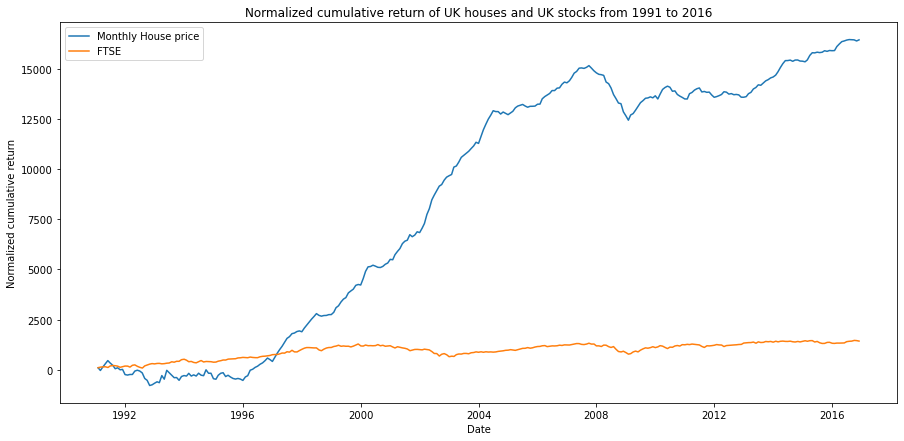

annualized return of FTSE in %: 4.462515478640672


In [35]:
# Question 5

# read the FTSE csv file
dfFTSE = pd.read_csv('FTSE100.csv')
# converted the date column to a date type
dfFTSE['Date'] = pd.to_datetime(dfFTSE['Date'])

# used only rows where the date is between 1991 and 2016
dfFTSE = dfFTSE.loc[dfFTSE['Date'].between('1991-01-01', '2016-12-31')]
# reversed the dataframe
dfFTSE = dfFTSE.loc[::-1]

# calculate the montly return
dfFTSE['Monthly return'] = dfFTSE['Adj Close'].pct_change()
# calculate the cumulative return of stocks
dfFTSE['Cumulative return'] = (dfFTSE['Monthly return']).cumsum()

# calculate the cumulative return of housing prices
dfMHP['Cumulative return'] = (dfMHP['Monthly return']).cumsum()

# normalized the prices to start with 100
normalizedMHPCumulative = dfMHP['Cumulative return'] / dfMHP['Cumulative return'][1] * 100
normalizedFTSECumulative = dfFTSE['Cumulative return'] / dfFTSE['Cumulative return'][310] * 100

# making the graph bigger for better visibility
plt.figure(figsize=(15, 7))

# plot the normalized prices for house and stocks
plt.plot(dfMHP['Date'], normalizedMHPCumulative, label="Monthly House price")
plt.plot(dfFTSE['Date'], normalizedFTSECumulative, label="FTSE")

# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Normalized cumulative return')

# giving a title to my graph
plt.title('Normalized cumulative return of UK houses and UK stocks from 1991 to 2016')

plt.legend()

plt.show()

# calculate the return between 1991 and 2016
returns = (dfFTSE['Adj Close'].iloc[311] - dfFTSE['Adj Close'].iloc[0])/dfFTSE['Adj Close'].iloc[0]
# calculate the average return rate per year for the 26 years
rate = ((1 + returns)**(1/26)) - 1 


print("annualized return of FTSE in %: " + str(rate * 100))